In [1]:
import numpy as np

def V(x, R):
    if np.abs(x) <= R:
        return -V0
    else:
        return 0
    

In [22]:
import numpy as np
import math

eps = 1e-3
Nmax = 100
start = -0.0
end = 70.0 # Precision , [ a , b ]
V0 = 60

def even_wf(Eb):
    sq_val = np.sqrt(V0 - Eb)
    return sq_val*np.tan(sq_val) - np.sqrt(Eb)

f = even_wf

def Bisection(Xminus,Xplus,Nmax,eps):
    for it in range ( 0 , Nmax) :
        x = (Xplus + Xminus ) / 2.
        print("it= ",it," x= ",x," f(x)= ",f(x))
        if(f(Xplus)*f(x)>0.):
            Xplus = x 
        else: 
            Xminus = x
        if(abs(f(x))<eps):
            print("\n Root found with precision eps = " , eps )
            break
        if it == Nmax-1: 
            print ( "\n No root after Niterations \n " )
    return x
root = Bisection(start,end,Nmax,eps)
print ( " Root = " , root )

it=  0  x=  35.0  f(x)=  -22.818654814332543
it=  1  x=  52.5  f(x)=  -8.413186909296943
it=  2  x=  61.25  f(x)=  nan
it=  3  x=  65.625  f(x)=  nan
it=  4  x=  67.8125  f(x)=  nan
it=  5  x=  68.90625  f(x)=  nan
it=  6  x=  69.453125  f(x)=  nan
it=  7  x=  69.7265625  f(x)=  nan
it=  8  x=  69.86328125  f(x)=  nan
it=  9  x=  69.931640625  f(x)=  nan
it=  10  x=  69.9658203125  f(x)=  nan
it=  11  x=  69.98291015625  f(x)=  nan
it=  12  x=  69.991455078125  f(x)=  nan
it=  13  x=  69.9957275390625  f(x)=  nan
it=  14  x=  69.99786376953125  f(x)=  nan
it=  15  x=  69.99893188476562  f(x)=  nan
it=  16  x=  69.99946594238281  f(x)=  nan
it=  17  x=  69.9997329711914  f(x)=  nan
it=  18  x=  69.9998664855957  f(x)=  nan
it=  19  x=  69.99993324279785  f(x)=  nan
it=  20  x=  69.99996662139893  f(x)=  nan
it=  21  x=  69.99998331069946  f(x)=  nan
it=  22  x=  69.99999165534973  f(x)=  nan
it=  23  x=  69.99999582767487  f(x)=  nan
it=  24  x=  69.99999791383743  f(x)=  nan
it=  25  x

<ipython-input-22-61787888f2bf>:11: RuntimeWarning: invalid value encountered in sqrt
  sq_val = np.sqrt(V0 - Eb)


 nl= 502 nr= 502
0.02
86.5 0


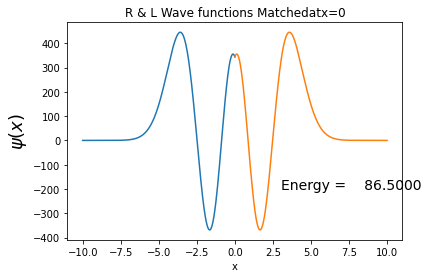

89.25 1


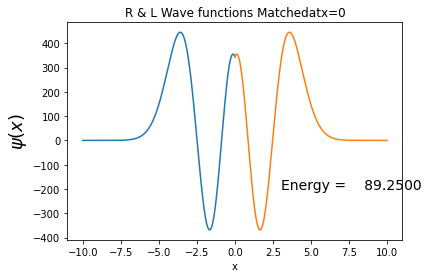

87.875 2


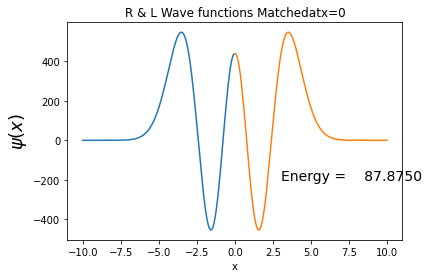

88.5625 3


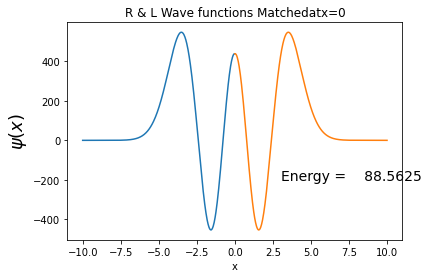

88.90625 4


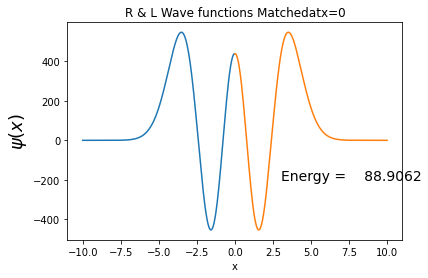

88.734375 5


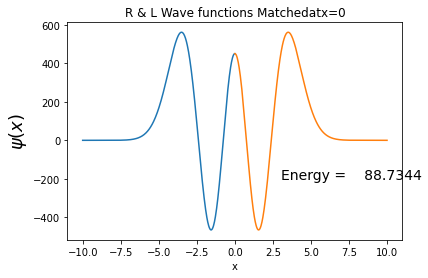

88.8203125 6


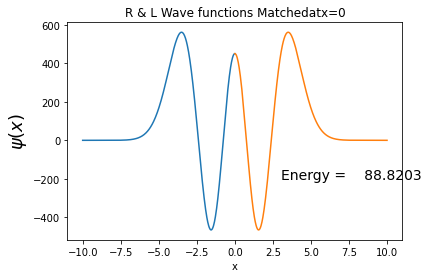

88.77734375 7


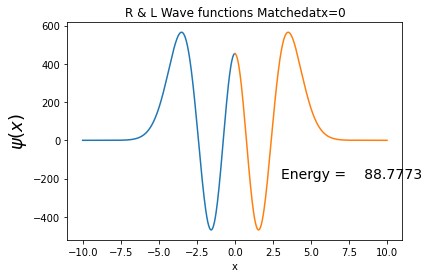

88.798828125 8


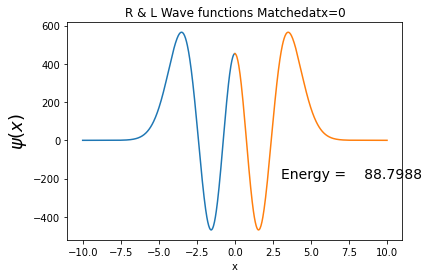

88.7880859375 9


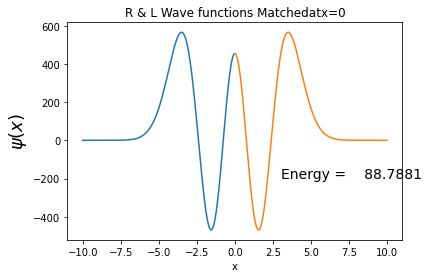

88.79345703125 10


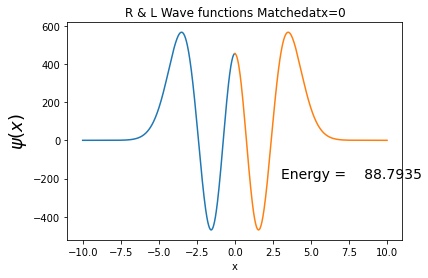

88.790771484375 11


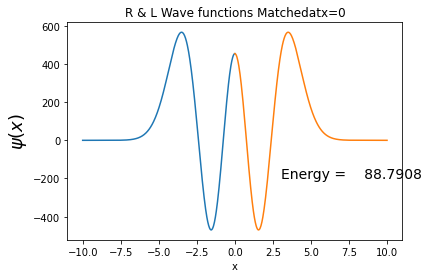

88.7894287109375 12


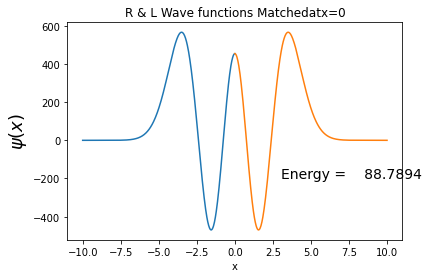

88.79010009765625 13


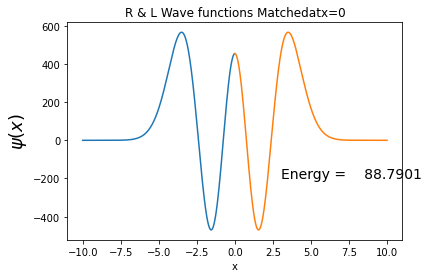

88.78976440429688 14


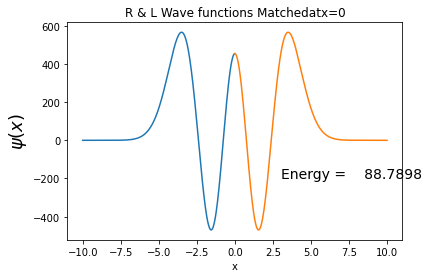

In [31]:
# QuantumNumerov.py : quantum bound state via Numerov algor i thm
# General method, but here for HO V(x)= 9.4*x*x/2
# hbarc * omega=hbarc * sqrt(k/m)=19.733 , r mc**2=940 MeV, k=9.4
# E =(N+1/2)hbarc * omega = (N+1/2) 19.733 , N even , change N odd
import numpy as np , matplotlib.pyplot as plt
n = 1000; m = 2 ; imax = 100; Xleft0 = -10; Xright0 = 10
h = 0.02; amin= 81.; amax = 92.; e = amin ; de = 0.01
eps= 1e-4; im = 500; nl = im + 2 ; nr = n - im + 2
xmax = 5.0
print(f" nl= {nl} nr= {nr}")
print (h)
xLeft = np.arange ( -10 ,0.02 ,0.02) ; xRight = np.arange (10 ,0.02 , -0.02)
xp = np.arange ( -10 ,10 ,0.02) # Bi section interval
uL = np.zeros((503),float) ; uR=np.zeros([503],float)
k2L = np.zeros([1000],float) ; k2R=np.zeros([1000],float)
uL[0]=0 ; uL[1]=0.00001; uR[0] = 0 ; uR[1] = 0.00001
#############

def V(x): # Pot ent ial harmonic o s c i l l a t o r
    v = 4.7*x*x
    return v
def setk2(e): # Set s k2L=( s q r t ( e−V) ) ^2 and k2R
    for i in range(0,n) :
        xLeft = Xleft0 + i*h
        xr = Xright0 - i*h
        fact=0.04829 # 2 m*c**2/ hbarc**2=2*940/(197.33)**2
        k2L[i] = fact*(e-V(xLeft))
        k2R[i] = fact*(e-V(xr))
def Numerov (n , h , k2 , u , e ) :
    setk2(e)
    b=(h**2)/12.0 # L & R Psi
    for i in range(1,n):
        u[i+1]=(2*u[i]*(1 -5.*b*k2[i])-(1+b*k2[i-1])*u[i-1])/(1+b*k2[i+1])
def diff( e ) :
    Numerov( nl , h , k2L , uL , e ) # Le f t wf
    Numerov( nr , h , k2R,uR, e ) # Right wf
    f0=(uR[nr-1]+uL[nl-1]-uR[nr-3]-uL[nl-3])/(h*uR[nr-2])
    return f0
istep = 0
x1 = np.arange ( -10 , .02 ,0.02) ; x2 = np.arange (10 , -0.02 , -0.02)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid()
while abs(diff(e)) > eps : # Bi sect ion algor i thm
    e =(amin + amax) /2
    print(e,istep)
    if diff(e)* diff(amax) > 0 : 
        amax = e
    else: 
        amin = e
    ax.clear()
    plt.text(3,-200,"Energy = %10.4f"%(e), fontsize=14)
    plt.plot(x1, uL[:-2])
    plt.plot(x2,uR[:-2])
    plt.xlabel('x')
    plt.ylabel('$\psi(x)$', fontsize=18)
    plt.title('R & L Wave functions Matchedatx=0' )
    istep = istep+1
    plt.pause(0.8) # Pause to delay figures
plt.show()